In [12]:

# Set your filepath -------------------------------------------------------

my_filepath <- "/Users/matthew.cohen/Dev/DataRobot_mc/Demo_R_API/"
config_path <- "/Users/matthew.cohen/.config/datarobot/drconfig.yaml"

# Loading packages --------------------------------------------------------

library(datarobot)
library(dplyr)
library(reshape2)
library(MLmetrics)
library(ggplot2)

# Loading functions for class ---------------------------------------------

setwd(my_filepath)
source("functions_for_class.R")

# Connecting to DataRobot -------------------------------------------------

ConnectToDataRobot(configPath = config_path)


Authentication token saved



,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6



   3    4    5    6    7    8    9 
  20  163 1457 2198  880  175    5 

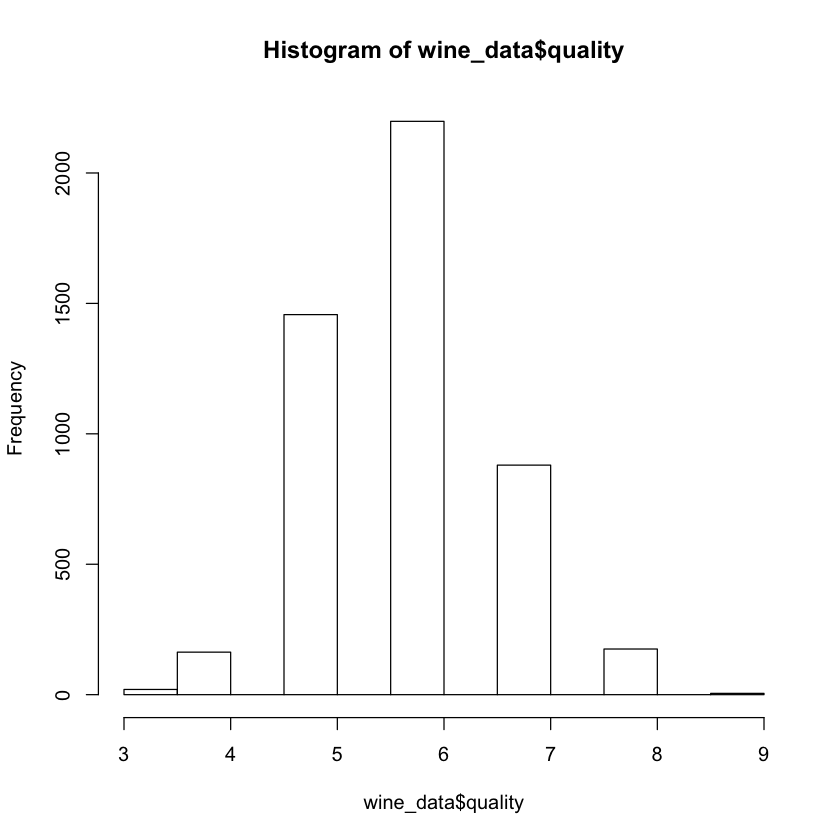

In [2]:

# Data preparation --------------------------------------------------------

# Downloading dataset to working directory
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
              destfile = "wine_data.csv", method = "libcurl")

# Loading dataset
wine_data <- read.csv("wine_data.csv", sep = ";")

# Checks
head(wine_data)
hist(wine_data$quality)
table(wine_data$quality)


In [3]:
# Good Wine?
wine_data$wine_is_good <- as.factor(ifelse(wine_data$quality >= 7, "good", "bad"))
prop.table(table(wine_data$wine_is_good))



      bad      good 
0.7835851 0.2164149 

In [4]:
# Seperate into training and testing
set.seed(10)
indices <- createTrainTest(target = wine_data$wine_is_good, sample_size = 0.9)
training <- wine_data[indices,]
testing <- wine_data[-indices,]

In [5]:

# Start of Project --------------------------------------------------------

# Creating and starting project in the cloud
project_object <- StartProject(dataSource = training, projectName = "Wine Quality - Basics",
                               target = "wine_is_good", mode = "quick", positiveClass = "good")

# Add max workers
UpdateProject(project_object, workerCount = -1)

# Creates verbose indicating how many are in progress, in queue with wait times
WaitForAutopilot(project_object)


Project Wine Quality - Basics creation requested, awaiting creation

Project 5e155b413b6e1a1756e7939a (Wine Quality - Basics) created

Autopilot started

Project 5e155b413b6e1a1756e7939a updated

In progress: 10, queued: 0 (waited: 0s)

In progress: 10, queued: 0 (waited: 1s)

In progress: 10, queued: 0 (waited: 1s)

In progress: 10, queued: 0 (waited: 2s)

In progress: 10, queued: 0 (waited: 4s)

In progress: 10, queued: 0 (waited: 6s)

In progress: 10, queued: 0 (waited: 10s)

In progress: 10, queued: 0 (waited: 17s)

In progress: 8, queued: 0 (waited: 30s)

In progress: 2, queued: 0 (waited: 50s)

In progress: 4, queued: 0 (waited: 71s)

In progress: 4, queued: 0 (waited: 91s)

In progress: 4, queued: 0 (waited: 112s)

In progress: 1, queued: 0 (waited: 133s)

In progress: 16, queued: 0 (waited: 153s)

In progress: 2, queued: 0 (waited: 174s)

In progress: 0, queued: 0 (waited: 194s)

In progress: 5, queued: 0 (waited: 215s)

In progress: 4, queued: 0 (waited: 235s)

In progress: 1,

In [6]:
# See project info
project_info <- GetProject(project_object)
project_info


$projectId
[1] "5e155b413b6e1a1756e7939a"

$projectName
[1] "Wine Quality - Basics"

$fileName
[1] "file81421aece3c7_autoSavedDF.csv"

$stage
[1] "modeling"

$autopilotMode
[1] 0

$created
[1] "2020-01-08T04:32:10.231826Z"

$target
[1] "wine_is_good"

$metric
[1] "LogLoss"

$partition
$partition$datetimeCol
NULL

$partition$cvMethod
[1] "stratified"

$partition$validationPct
NULL

$partition$holdoutPct
[1] 20.0091

$partition$reps
[1] 5

$partition$cvHoldoutLevel
NULL

$partition$holdoutLevel
NULL

$partition$userPartitionCol
NULL

$partition$validationType
[1] "CV"

$partition$trainingLevel
NULL

$partition$partitionKeyCols
NULL

$partition$useTimeSeries
NULL

$partition$validationLevel
NULL


$recommender
$recommender$recommenderItemId
NULL

$recommender$isRecommender
NULL

$recommender$recommenderUserId
NULL


$advancedOptions
$advancedOptions$scaleoutModelingMode
[1] "disabled"

$advancedOptions$responseCap
[1] FALSE

$advancedOptions$onlyIncludeMonotonicBlueprints
[1] FALSE

$adva

In [7]:
# Collects all the models from project as a sorted list object
all_models <- ListModels(project_object)

# Creates a nice data.frame of results
as.data.frame(all_models)


modelType,expandedModel,modelId,blueprintId,featurelistName,featurelistId,samplePct,validationMetric
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
RandomForest Classifier (Gini),RandomForest Classifier (Gini)::Missing Values Imputed,5e155ce2243e8e737b7a0133,b7efcb971533aa88b3ce3480f581cd92,Informative Features - Leakage Removed,5e155b744823d8562b94c868,100.0000,0.31318
RandomForest Classifier (Gini),RandomForest Classifier (Gini)::Missing Values Imputed,5e155c9a243e8e72b07a012a,de20704d755c3770b96dcad4aec57e52,Informative Features - Leakage Removed,5e155b744823d8562b94c868,79.9910,0.32497
RandomForest Classifier (Gini),RandomForest Classifier (Gini)::Missing Values Imputed,5e155bbe311d476b99a5eb2a,de20704d755c3770b96dcad4aec57e52,Informative Features - Leakage Removed,5e155b744823d8562b94c868,63.9746,0.34511
AVG Blender,AVG Blender,5e155d31311d4770a5a5eb75,11b45a07e57f17ce917a71b27b00c743,Multiple featurelists,Multiple featurelist ids,63.9746,0.34645
RandomForest Classifier (Gini),RandomForest Classifier (Gini)::Missing Values Imputed,5e155c4b311d476d1fa5eb46,de20704d755c3770b96dcad4aec57e52,DR Reduced Features M16,5e155c4b311d476d1fa5eb3e,63.9746,0.34920
eXtreme Gradient Boosted Trees Classifier,eXtreme Gradient Boosted Trees Classifier::Missing Values Imputed,5e155bbe311d476b99a5eb2b,5baaa61a36114e4bf97a90a066a25e44,Informative Features - Leakage Removed,5e155b744823d8562b94c868,63.9746,0.36808
Light Gradient Boosted Trees Classifier with Early Stopping,Light Gradient Boosted Trees Classifier with Early Stopping::Missing Values Imputed,5e155bbe311d476b99a5eb2d,ca6302a612e3b04e7e4b22bf50acb3c5,Informative Features - Leakage Removed,5e155b744823d8562b94c868,63.9746,0.37334
Light Gradient Boosting on ElasticNet Predictions,Light Gradient Boosting on ElasticNet Predictions ::Missing Values Imputed::Standardize::Elastic-Net Classifier (L2 / Binomial Deviance),5e155bbe311d476b99a5eb2c,7a0794b8657d6bfb298b884add861fc4,Informative Features - Leakage Removed,5e155b744823d8562b94c868,63.9746,0.37390
RandomForest Classifier (Gini),RandomForest Classifier (Gini)::Missing Values Imputed,5e155b7a4823d8562b94c887,de20704d755c3770b96dcad4aec57e52,Informative Features - Leakage Removed,5e155b744823d8562b94c868,31.9873,0.38142


In [8]:
# Grabbing the recommended model
best_model <- GetRecommendedModel(project_object, type = "Recommended for Deployment")

# Description of best model
model_info <- GetBlueprintDocumentation(project_object, blueprintId = best_model$blueprintId)
str(model_info)


List of 2
 $ :List of 6
  ..$ task       : chr "Numeric impute task"
  ..$ description: chr "Impute missing values on numeric variables with their median and create indicator variables to identify records"| __truncated__
  ..$ parameters :List of 2
  .. ..$ :List of 3
  .. .. ..$ type       : chr "int"
  .. .. ..$ name       : chr "threshold (t)"
  .. .. ..$ description: chr "The minimum number of finite elements required in a column to impute the data onto nan’s and inf’s values: [1, 99999] "
  .. ..$ :List of 3
  .. .. ..$ type       : chr "bool"
  .. .. ..$ name       : chr "scale_small (s)"
  .. .. ..$ description: chr "True if small values (range of the numeric variable is <= 1) are to be scaled values: [False, True] "
  ..$ title      : chr "Missing Values Imputed Documentation — DataRobot Model Documentation"
  ..$ links      : list()
  ..$ references :List of 2
  .. ..$ :List of 2
  .. .. ..$ url : chr "http://academic.uprm.edu/~eacuna/IFCS04r.pdf"
  .. .. ..$ name: chr "Acuna,

In [9]:

# Getting Predictions -----------------------------------------------------

# Uploading the testing dataset
scoring <- UploadPredictionDataset(project_object, dataSource = testing)

# Requesting prediction
predict_job_id <- RequestPredictions(project_object, 
                                     modelId = best_model$modelId, 
                                     datasetId = scoring$id)

# Grabbing predictions
predictions_prob <- GetPredictions(project_object, 
                                   predictId = predict_job_id, 
                                   type = "probability")

# Output
head(data.frame(True_Class = testing$wine_is_good, Probability = predictions_prob))


request issued, waiting for predictions

Binary classifier with positiveClass = good



,True_Class,Probability
,<fct>,<dbl>
1,bad,0.01577857
2,bad,0.02899286
3,bad,0.07200873
4,bad,0.23083232
5,bad,0.11356111
6,bad,0.20047778


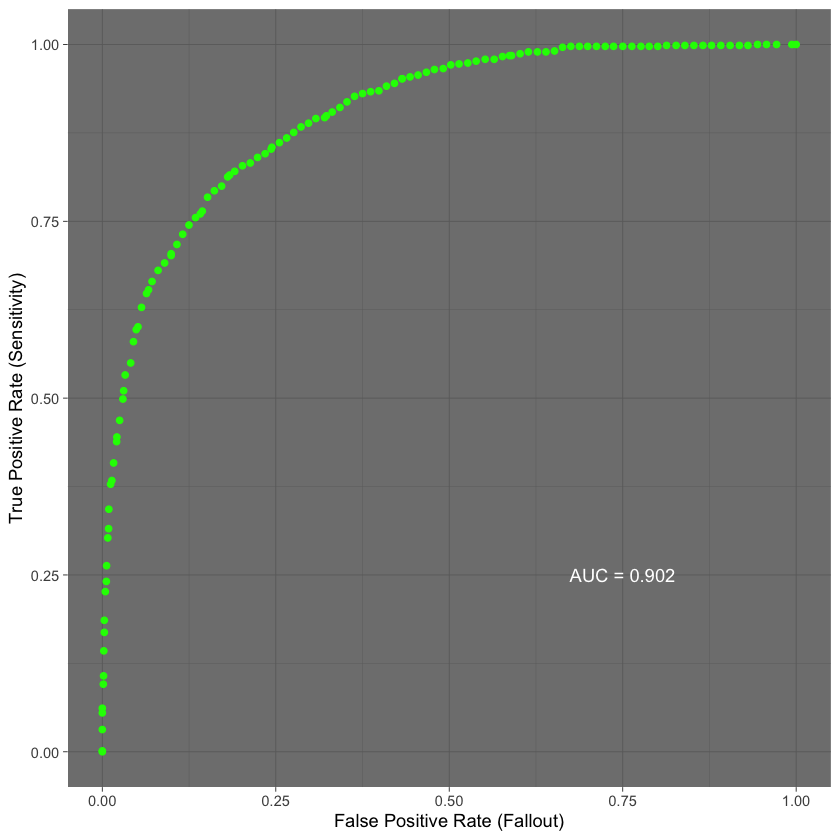

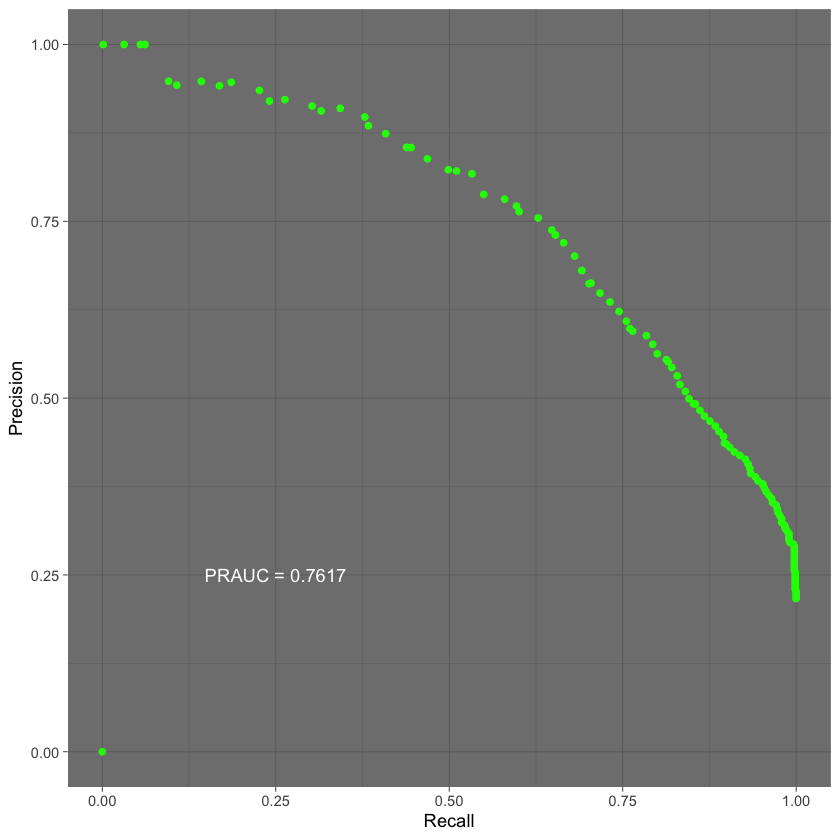

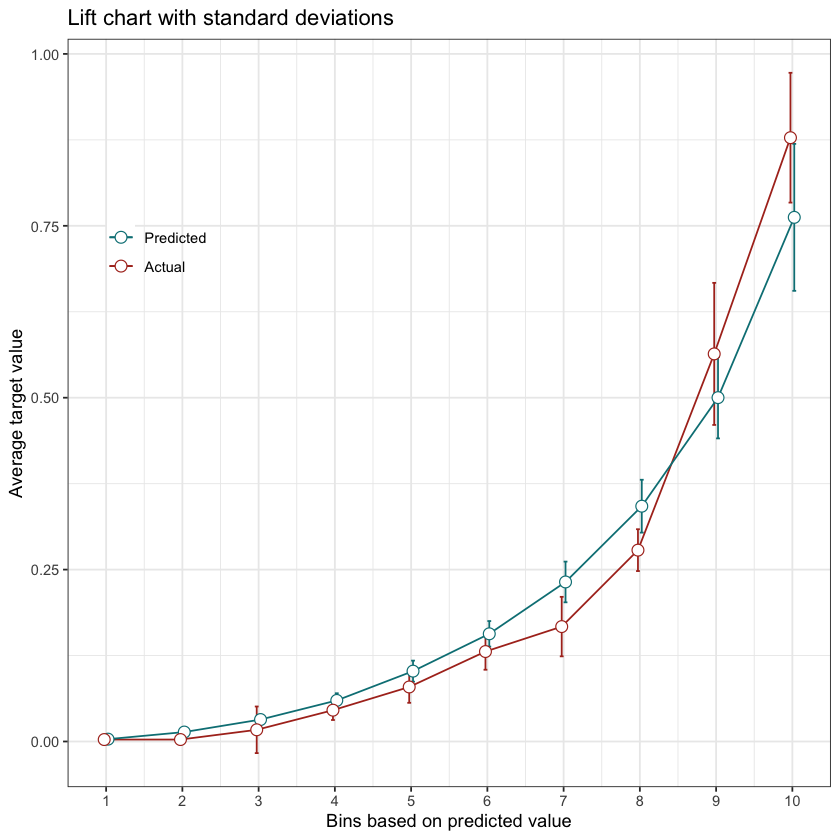

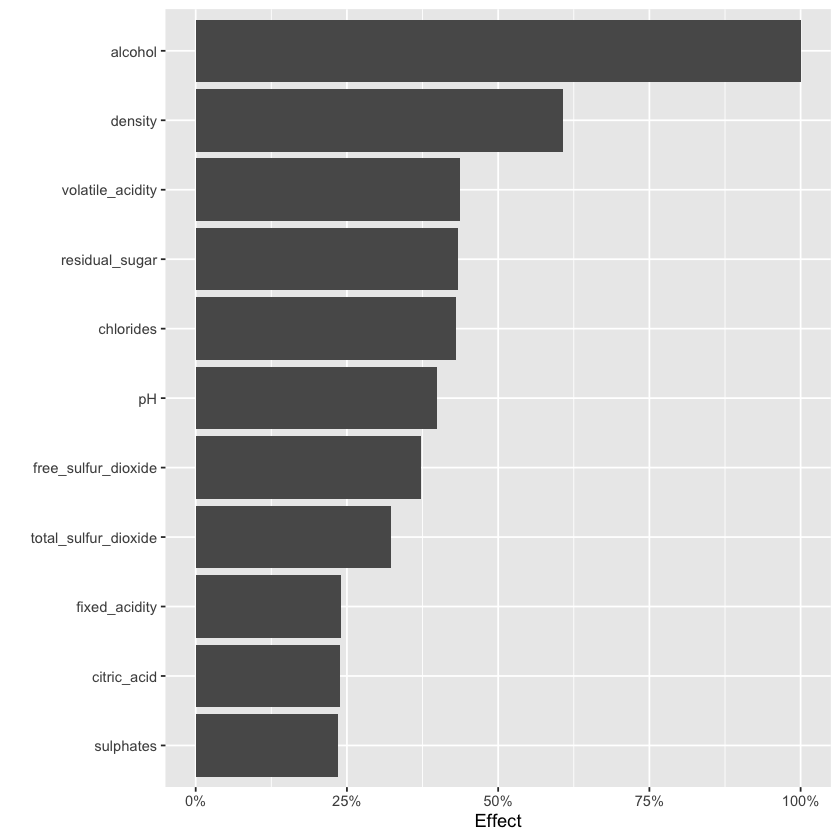

In [10]:

# Model Insights ----------------------------------------------------------

# Get the ROC curve
roc_data <- GetRocCurve(best_model, source = DataPartition$CROSSVALIDATION)

ggplot(roc_data$rocPoints, aes(x = falsePositiveRate, y = truePositiveRate)) + 
  geom_point(color = "green") + xlab("False Positive Rate (Fallout)") + ylab("True Positive Rate (Sensitivity)") + 
  theme_dark() + 
  annotate("text", x = .75, y = .25, color = "white", 
           label = paste("AUC =", round(Area_Under_Curve(roc_data$rocPoints$falsePositiveRate, 
                                                         roc_data$rocPoints$truePositiveRate), 4)))

# Get Precision-Recall curve
ggplot(roc_data$rocPoints, aes(x = truePositiveRate, y = positivePredictiveValue)) +
  geom_point(color = "green") + xlab("Recall") + ylab("Precision") + 
  theme_dark() +
  annotate("text", x = .25, y = .25, color = "white",
           label = paste("PRAUC =", round(Area_Under_Curve(roc_data$rocPoints$truePositiveRate, 
                                                           roc_data$rocPoints$positivePredictiveValue), 4)))

# Get lift chart
lift_data <- GetLiftChart(best_model, source = DataPartition$CROSSVALIDATION)

# Create means and standard deviations
lift_data$index <- rep(1:10, each = 6) # into deciles
lift_data_predicted <- lift_data %>%
  group_by(index) %>%
  summarise(group = "predicted",
            value = mean(predicted),
            sd = sd(predicted))
lift_data_actual <- lift_data %>%
  group_by(index) %>%
  summarise(group = "actual",
            value = mean(actual),
            sd = sd(actual))

# Gather them and plot
plot_data <- bind_rows(lift_data_predicted, lift_data_actual)
ggplot(plot_data, aes(x = index, y = value, colour = group, group = group)) +
  geom_errorbar(aes(ymin = value-sd, ymax = value+sd), width=.1, position = position_dodge(0.1)) +
  geom_line(position = position_dodge(0.1)) +
  geom_point(position = position_dodge(0.1), size = 3, shape = 21, fill="white") +
  xlab("Bins based on predicted value") +
  ylab("Average target value") +
  scale_colour_hue(guide = guide_legend(title = NULL),
                   breaks=c("predicted", "actual"),
                   labels=c("Predicted", "Actual"), l = 40) +
  ggtitle("Lift chart with standard deviations") +
  scale_x_continuous(breaks=1:10) + 
  theme_bw() +
  theme(legend.justification = c(-.25,.75),
        legend.position = c(0,.75),
        legend.background = element_blank())

# Get feature impact - no need to request since recommended has already been calculated
feature_impact <- GetFeatureImpactForModel(best_model)

ggplot(data = feature_impact, aes(x = reorder(featureName, impactNormalized), y = impactNormalized)) + 
  geom_bar(stat = "identity") + coord_flip() + ylab("Effect") + xlab("") +
  scale_y_continuous(labels = function(x){ paste0(x*100, "%") })


request issued, waiting for predictions

Binary classifier with positiveClass = good

Prediction explanations initialization requested for model RandomForest Classifier (Gini) (modelId =  5e155ce2243e8e737b7a0133 )

Waiting for prediction explanations initialization to complete

Prediction explanations requested for model RandomForest Classifier (Gini) (modelId =  5e155ce2243e8e737b7a0133 )

Prediction explanations request issued: awaiting response



,rowId,predictionExplanationId,prediction,class1Label,class1Probability,class2Label,class2Probability,explanation1FeatureName,explanation1FeatureValue,explanation1QualitativeStrength,⋯,explanation2FeatureName,explanation2FeatureValue,explanation2QualitativeStrength,explanation2Strength,explanation2Label,explanation3FeatureName,explanation3FeatureValue,explanation3QualitativeStrength,explanation3Strength,explanation3Label
,<dbl>,<fct>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,0,5e155de64322bb06f55e58f6,bad,good,0.01577857,bad,0.9842214,alcohol,9.50,---,⋯,pH,3.3000,++,0.8550662,good,free_sulfur_dioxide,14.0000,--,-0.8339427,good
2,1,5e155de64322bb06f55e58f6,bad,good,0.02899286,bad,0.9710071,alcohol,10.10,---,⋯,chlorides,0.0500,--,-0.8663555,good,density,0.9951,--,-0.8112673,good
3,2,5e155de64322bb06f55e58f6,bad,good,0.07200873,bad,0.9279913,pH,3.42,+++,⋯,density,0.9951,--,-0.6228568,good,alcohol,10.0000,--,-0.6145568,good
4,3,5e155de64322bb06f55e58f6,bad,good,0.23083232,bad,0.7691677,pH,3.38,+++,⋯,density,0.9961,--,-0.5376891,good,volatile_acidity,0.2800,++,0.3507325,good
5,4,5e155de64322bb06f55e58f6,bad,good,0.11356111,bad,0.8864389,alcohol,9.40,---,⋯,free_sulfur_dioxide,63.0000,++,0.4687572,good,volatile_acidity,0.2300,++,0.4210929,good
6,5,5e155de64322bb06f55e58f6,bad,good,0.20047778,bad,0.7995222,total_sulfur_dioxide,173.00,---,⋯,chlorides,0.0620,--,-0.3760285,good,residual_sugar,1.6000,--,-0.2568438,good


integer(0)

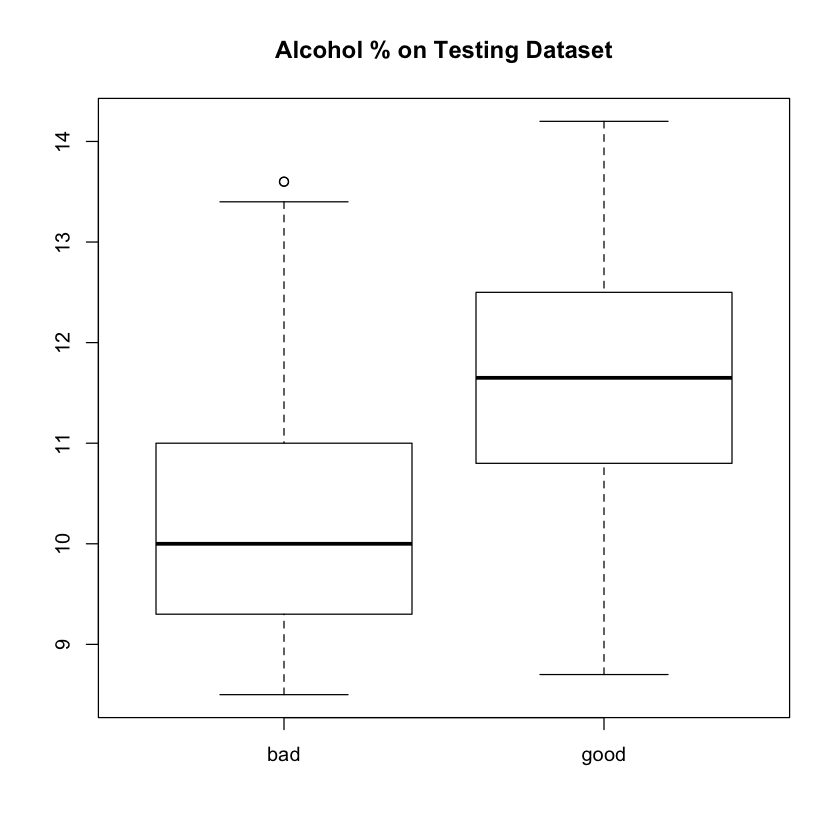

In [11]:

# Prediction Explanations ----------------------------------------------------------

pe_frame = GetPredictionExplanations(best_model, dataset = scoring$id, maxExplanations = 3)

head(pe_frame)
# Feature that appeared in top explanation the most across testing dataset?
sort(table(pe_frame$reason1FeatureName), decreasing = TRUE)

# Plot distribution of alcohol for good and bad wines
boxplot(alcohol ~ wine_is_good, data = testing)
title("Alcohol % on Testing Dataset")


### ------------
### Getting predictions from a deployment via the dedicated prediction engine
### ------------

In [13]:

library(httr)
library(datarobot)
library(yaml) # only for uploading my config file
library(jsonlite)

# Connect to the Modeling API Endpoint. Specify API token and in this case ignoring SSL verification
ConnectToDataRobot(configPath = config_path,
                   sslVerify = FALSE)
BaseURL <- 'https://app.datarobot.com'
ProjectId <- project_info$projectId

Authentication token saved



In [16]:

# Set up API authentication
api_config <- yaml.load_file(config_path)

# api_config$token should be your API key
APITokenCloud <- paste("Token", api_config$token)

# you can also run a project within this script, just be sure to capture the project object
Project <- GetProject(ProjectId)

# Note that if you choose MostAccurate, this will likely be a blender
# in which case predictions will be slower
ModelToDeploy <- GetRecommendedModel(Project, type = RecommendedModelType$MostAccurate)
ModelToDeploy


$blueprintId
[1] "de20704d755c3770b96dcad4aec57e52"

$featurelistId
[1] "5e155b744823d8562b94c868"

$featurelistName
[1] "Informative Features - Leakage Removed"

$modelId
[1] "5e155bbe311d476b99a5eb2a"

$isFrozen
[1] FALSE

$isStarred
[1] FALSE

$metrics
$metrics$AUC
  backtesting holdout backtestingScores crossValidation validation
1          NA      NA                NA        0.882792    0.87101

$metrics$`Rate@Top5%`
  backtesting holdout backtestingScores crossValidation validation
1          NA      NA                NA        0.927776    0.88889

$metrics$`Max MCC`
  backtesting holdout backtestingScores crossValidation validation
1          NA      NA                NA        0.575494    0.55827

$metrics$RMSE
  backtesting holdout backtestingScores crossValidation validation
1          NA      NA                NA         0.32361    0.33039

$metrics$`Kolmogorov-Smirnov`
  backtesting holdout backtestingScores crossValidation validation
1          NA      NA                NA

In [20]:
# get list of available prediction servers
result <- GET(paste0(BaseURL, '/api/v2/predictionServers/'),
     add_headers(.headers = c("Content-Type" = "application/json;charset=UTF-8;", "AUTHORIZATION" = APITokenCloud))
)
result

# take the first prediction server that is available for the deployment of the model
PredictionServerId <- content(result)$data[[1]]$id
PredictionServerId
PredictionsEndpoint <- content(result)$data[[1]]$url
PredictionsEndpoint
DataRobotKey <- content(result)$data[[1]]$`datarobot-key`
DataRobotKey

Response [https://app.datarobot.com/api/v2/predictionServers/]
  Date: 2020-01-08 04:54
  Status: 200
  Content-Type: application/json
  Size: 642 B


[1] "5a61d7a0fbd723001a2f70d9"

[1] "https://cfds-ccm-prod.orm.datarobot.com"

[1] "544ec55f-61bf-f6ee-0caf-15c7f919a45d"

In [24]:

# Deploy model ----------------------------------------------------------

# fill out these fields with the desired info
Username <- 'matthew.cohen@datarobot.com'
DeploymentName <- "New R Deployment Label"
DeploymentDescription <- "New R Deployment Description"

# Pass Variables to a list. This is the deployment payload
DeployBodyCloud <- list(
  projectId = ProjectId,
  modelId = ModelToDeploy$modelId,
  label = DeploymentName,
  description = DeploymentDescription,
  status = 'active',
  deploymentType = 'dedicated',
  trainingDataSubset = 'eda',
  # Instance ID is needed to deploy on our Cloud. Not necessary for On-Prem
  instanceId = PredictionServerId
)

# Convert above payload to JSON
JSONBody <- toJSON(DeployBodyCloud, auto_unbox = TRUE)

# The REST Call to deploy the model. We are passing the endpoint, the payload, format, and authorization headers in a POST call.
result <- POST(paste0(BaseURL, '/api/v2/modelDeployments/asyncCreate/'),
               body = JSONBody,
               add_headers(.headers = c("Content-Type" = "application/json", "AUTHORIZATION" = APITokenCloud)))

# Store the output of the above REST Call, which is the DeploymentID
DeploymentId <- content(result)$id


In [25]:

# Get new predictions from deployed model ----------------------------------------------------------

# write the testing dataframe to csv for an easy read with httr for example purposes
write.csv(testing, "testing.csv", row.names = FALSE)
PredictionFile <- "testing.csv"

# Predict on the new testing data
URL <- paste0(PredictionsEndpoint, '/predApi/v1.0/deployments/', DeploymentId, '/predictions')
result <- POST(URL,
               body = upload_file(PredictionFile),
               type = "text/plain; encoding=UTF-8",
               add_headers('datarobot-key' = DataRobotKey),
               # note we are not using the token prefix in this authentication
               authenticate(Username, api_config$token, type='basic'))
body <- fromJSON(content(result, 'text', encoding='UTF-8'))
body$data

,predictionValues,predictionThreshold,prediction,rowId
,<list>,<dbl>,<chr>,<int>
1,"0.0173849206, 0.9826150794, good , bad",0.5,bad,0
2,"0.0493746032, 0.9506253968, good , bad",0.5,bad,1
3,"0.0946436508, 0.9053563492, good , bad",0.5,bad,2
4,"0.2318325397, 0.7681674603, good , bad",0.5,bad,3
5,"0.0965428571, 0.9034571429, good , bad",0.5,bad,4
6,"0.3200738095, 0.6799261905, good , bad",0.5,bad,5
7,"0.1146285714, 0.8853714286, good , bad",0.5,bad,6
8,"0.015652381, 0.984347619, good , bad",0.5,bad,7
9,"0.0014, 0.9986, good , bad",0.5,bad,8
